In [67]:
import pandas as pd
import numpy as np
import os

PATH = os.getcwd()

PATH = PATH + '/data/'
#PATH

In [68]:
df = pd.read_excel(PATH+'generatoroutput.xlsx')
df

,Document,docID,xmlns,xmlns:xsi,xsi:schemaLocation,DocHeader,DocTitle,DocRevision,DocConfidentiality,DocConfClass,...,DeliveryYear,DailyData,Day,HourlyData,Hour,FuelTotal,Fuel,EnergyValue,OutputQuality,Output
0,NaN,GenOutputbyFuelHourly,http://www.ieso.ca/schema,http://www.w3.org/2001/XMLSchema-instance,http://www.ieso.ca/schema http://reports.ieso....,NaN,Generator Output by Fuel Type Hourly Report,1.0,NaN,PUB,...,2018.0,NaN,2018-01-01,NaN,1.0,NaN,NUCLEAR,NaN,0,11671
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GAS,NaN,0,1583
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,HYDRO,NaN,0,4152
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WIND,NaN,0,992
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SOLAR,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GAS,NaN,0,232
52556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,HYDRO,NaN,0,3136
52557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WIND,NaN,0,1897
52558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SOLAR,NaN,-1,0


In [69]:
df.head()

,Document,docID,xmlns,xmlns:xsi,xsi:schemaLocation,DocHeader,DocTitle,DocRevision,DocConfidentiality,DocConfClass,...,DeliveryYear,DailyData,Day,HourlyData,Hour,FuelTotal,Fuel,EnergyValue,OutputQuality,Output
0,NaN,GenOutputbyFuelHourly,http://www.ieso.ca/schema,http://www.w3.org/2001/XMLSchema-instance,http://www.ieso.ca/schema http://reports.ieso....,NaN,Generator Output by Fuel Type Hourly Report,1.0,NaN,PUB,...,2018.0,NaN,2018-01-01,NaN,1.0,NaN,NUCLEAR,NaN,0,11671
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,GAS,NaN,0,1583
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,HYDRO,NaN,0,4152
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,WIND,NaN,0,992
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SOLAR,NaN,0,0


In [70]:
df1 = df[['Fuel','Output']]

In [71]:
df1.head()

,Fuel,Output
0,NUCLEAR,11671
1,GAS,1583
2,HYDRO,4152
3,WIND,992
4,SOLAR,0


In [72]:
s = df.groupby('Fuel')['Output'].apply(list)
s.apply(pd.Series).T

Fuel,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND
0,3,1583,4152,11671,0,992
1,1,1192,4093,11672,0,1124
2,0,1040,4231,11672,0,1265
3,0,1041,3895,11669,0,1369
4,0,1004,3271,11674,0,1848
...,...,...,...,...,...,...
8755,27,229,4094,11200,0,2303
8756,27,230,3710,11188,0,2581
8757,27,232,3482,11187,0,2299
8758,27,233,3254,11212,0,2506


In [73]:
df2 = s.apply(pd.Series).T.copy()

In [74]:
df2.head()

Fuel,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND
0,3,1583,4152,11671,0,992
1,1,1192,4093,11672,0,1124
2,0,1040,4231,11672,0,1265
3,0,1041,3895,11669,0,1369
4,0,1004,3271,11674,0,1848


In [75]:
df2['TotalOutput'] = df2[['BIOFUEL','GAS','HYDRO','NUCLEAR','SOLAR','WIND']].sum(axis=1)

In [76]:
df2.head()

Fuel,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput
0,3,1583,4152,11671,0,992,18401
1,1,1192,4093,11672,0,1124,18082
2,0,1040,4231,11672,0,1265,18208
3,0,1041,3895,11669,0,1369,17974
4,0,1004,3271,11674,0,1848,17797


In [77]:
df3 = pd.read_csv(PATH+'PUB_Demand_2018.csv',skiprows=3)

In [78]:
df3.head()

,Date,Hour,Market Demand,Ontario Demand
0,2018-01-01,1,18974,16627
1,2018-01-01,2,18447,16084
2,2018-01-01,3,18453,15866
3,2018-01-01,4,18662,15725
4,2018-01-01,5,18060,15470


In [79]:
df4 = pd.read_csv(PATH+'PUB_PriceHOEPPredispOR_2018.csv',skiprows=3)

In [80]:
df4.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
0,2018-01-01,1,51.29,40.62,35.50,40.32,0.20,0.20,0.19
1,2018-01-01,2,43.59,40.93,40.57,30.22,0.20,0.20,0.20
2,2018-01-01,3,93.60,49.84,45.30,40.20,0.25,0.25,0.22
3,2018-01-01,4,54.78,55.60,40.04,45.30,0.20,0.20,0.20
4,2018-01-01,5,14.35,40.04,34.80,47.47,0.20,0.20,0.20


In [81]:
df4.shape

(8760, 9)

In [82]:
df3.shape

(8760, 4)

In [83]:
df2.shape

(8760, 7)

In [84]:
df4.drop(columns=['Date','Hour','Hour 1 Predispatch','Hour 2 Predispatch','Hour 3 Predispatch', 'OR 10 Min Sync', 'OR 10 Min non-sync', 'OR 30 Min'], inplace=True)

In [85]:
df4.head()

,HOEP
0,51.29
1,43.59
2,93.60
3,54.78
4,14.35


In [86]:
df3.set_index('Date').head()

,Hour,Market Demand,Ontario Demand
Date,,,
2018-01-01,1,18974,16627
2018-01-01,2,18447,16084
2018-01-01,3,18453,15866
2018-01-01,4,18662,15725
2018-01-01,5,18060,15470


In [87]:
result = pd.concat([df3,df4,df2],axis=1)

In [88]:
result.head()

,Date,Hour,Market Demand,Ontario Demand,HOEP,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput
0,2018-01-01,1,18974,16627,51.29,3,1583,4152,11671,0,992,18401
1,2018-01-01,2,18447,16084,43.59,1,1192,4093,11672,0,1124,18082
2,2018-01-01,3,18453,15866,93.60,0,1040,4231,11672,0,1265,18208
3,2018-01-01,4,18662,15725,54.78,0,1041,3895,11669,0,1369,17974
4,2018-01-01,5,18060,15470,14.35,0,1004,3271,11674,0,1848,17797


In [100]:
import random
def rand_(arr, num): 
    res = [] 
  
    for j in range(num): 
        if random.uniform(0,1)>0.5:
            res.append(arr[j]+random.randrange(10))
        else :
            x = arr[j]-random.randrange(10)
            if x<0:
                res.append(random.randrange(3))
            else:
                res.append(x)
  
    return res

cpny_price = rand_(result['HOEP'].values,8760)

In [103]:
print(cpny_price)

[51.29, 48.59, 97.6, 48.78, 12.35, 25.6, 24.72, 37.89, 25.75, 74.57, 4.65, 14.45, 4.65, 14.37, 32.730000000000004, 40.12, 38.28, 47.84, 40.22, 41.06, 51.76, 43.38, 49.58, 32.14, 39.120000000000005, 1.7599999999999998, 12.34, 0, 1, 19.36, 28.1, 43.9, 44.72, 53.03, 55.4, 71.6, 40.14, 38.35, 37.36, 27.98, 40.86, 41.33, 37.37, 45.44, 40.29, 41.64, 1, 34.72, 6.3100000000000005, 20.43, 1.0, 7.0, 2, 6.0, 31.259999999999998, 66.58, 87.95, 88.93, 89.83, 89.87, 97.33, 56.629999999999995, 46.84, 48.34, 77.3, 84.3, 93.01, 85.94, 84.84, 84.16, 76.34, 55.04, 17.77, 11.940000000000001, 8.469999999999999, 1, 1, 7.42, 23.91, 65.7, 67.25, 72.97, 66.74000000000001, 63.55, 54.98, 22.35, 6.33, 7.35, 30.1, 54.4, 56.01, 57.91, 59.82, 51.96, 75.71, 98.23, 11.5, 16.33, 6.359999999999999, 13.34, 10.45, 15.69, 69.23, 71.02, 83.79, 76.02, 84.64, 83.73, 74.35, 72.87, 70.42, 84.97, 78.9, 111.23, 104.51, 91.42, 128.05, 83.94, 71.07, 73.57, 49.71, 5.210000000000001, 7.32, 15.36, 20.76, 13.35, 42.6, 62.38, 58.51000000

In [90]:
len(cpny_price)

8760

In [91]:
df5 = pd.DataFrame({'Company_HOEP': cpny_price})

In [92]:
df5.shape

(8760, 1)

In [93]:
result = pd.concat([result,df5], axis=1)

In [94]:
result.head()

,Date,Hour,Market Demand,Ontario Demand,HOEP,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput,Company_HOEP
0,2018-01-01,1,18974,16627,51.29,3,1583,4152,11671,0,992,18401,58.29
1,2018-01-01,2,18447,16084,43.59,1,1192,4093,11672,0,1124,18082,50.59
2,2018-01-01,3,18453,15866,93.60,0,1040,4231,11672,0,1265,18208,98.60
3,2018-01-01,4,18662,15725,54.78,0,1041,3895,11669,0,1369,17974,50.78
4,2018-01-01,5,18060,15470,14.35,0,1004,3271,11674,0,1848,17797,22.35


In [95]:
result.set_index('Date')

,Hour,Market Demand,Ontario Demand,HOEP,BIOFUEL,GAS,HYDRO,NUCLEAR,SOLAR,WIND,TotalOutput,Company_HOEP
Date,,,,,,,,,,,,
2018-01-01,1,18974,16627,51.29,3,1583,4152,11671,0,992,18401,58.29
2018-01-01,2,18447,16084,43.59,1,1192,4093,11672,0,1124,18082,50.59
2018-01-01,3,18453,15866,93.60,0,1040,4231,11672,0,1265,18208,98.60
2018-01-01,4,18662,15725,54.78,0,1041,3895,11669,0,1369,17974,50.78
2018-01-01,5,18060,15470,14.35,0,1004,3271,11674,0,1848,17797,22.35
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,20,18276,16195,5.62,27,229,4094,11200,0,2303,17853,1.00
2018-12-31,21,18046,15668,8.95,27,230,3710,11188,0,2581,17736,0.95
2018-12-31,22,17516,14987,5.81,27,232,3482,11187,0,2299,17227,1.00


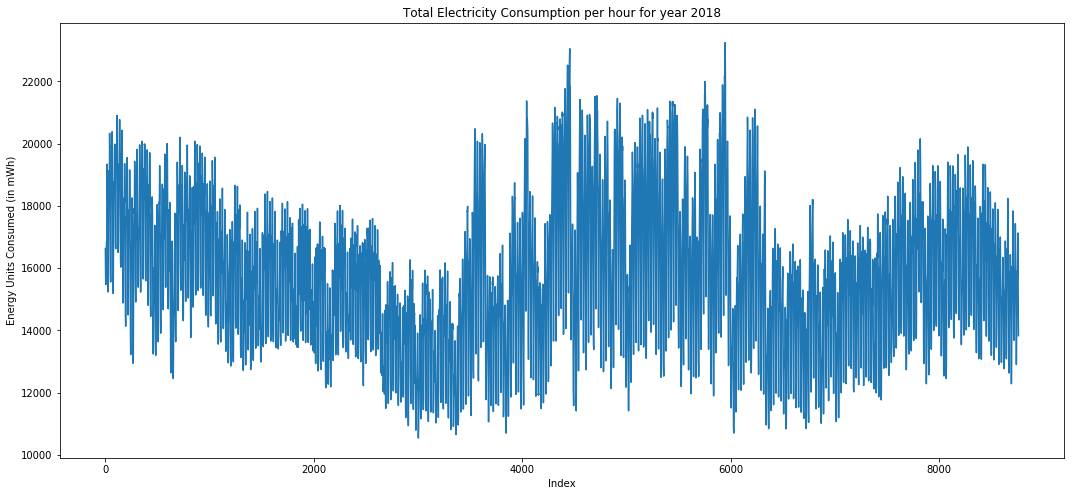

In [96]:
# Plotting data
import matplotlib.pyplot as plt

x = result.index
y = result['Ontario Demand']

fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(x,y)

plt.title('Total Electricity Consumption per hour for year 2018')
plt.xlabel('Index')
plt.ylabel('Energy Units Consumed (in mWh)')
plt.savefig('Demand_plot.png')
plt.show()

In [97]:
result.to_excel(PATH+'final_data.xlsx')